In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

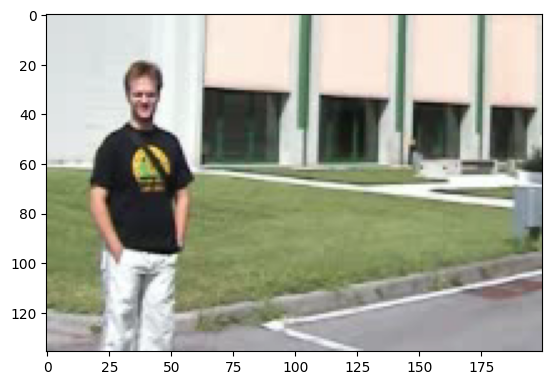

In [148]:
# 画像ファイルの読み込み
image = cv2.imread("sbi/sbi001.png")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像の表示
plt.imshow(image_rgb)

(25, 25, 3)


True

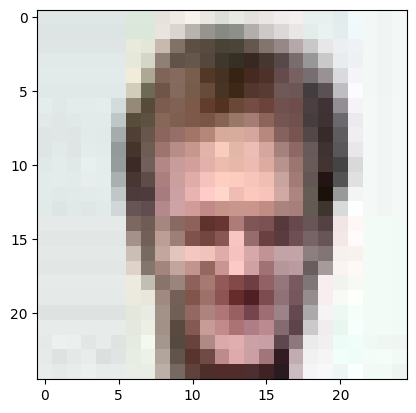

In [153]:
template_rgb = image_rgb[18:43, 26:51]

print(template.shape)

# 画像の表示
plt.imshow(template)

# RGBからBGRに変換
template_bgr = cv2.cvtColor(template_rgb, cv2.COLOR_BGR2RGB)

cv2.imwrite("template.png", template_bgr)

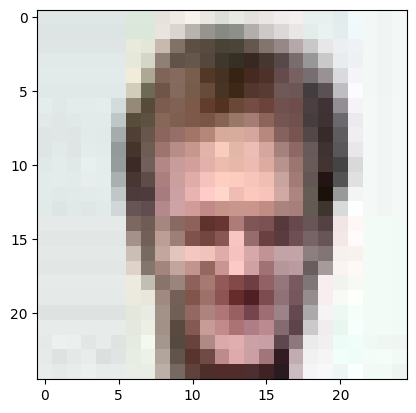

In [154]:
# 画像ファイルの読み込み
template = cv2.imread("template.png")

# BGRからRGBに変換
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# 画像の表示
plt.imshow(template_rgb)

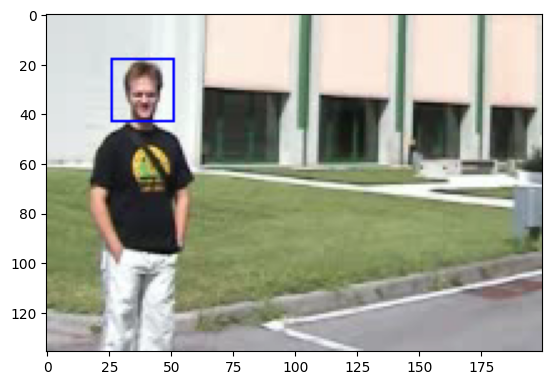

In [155]:
# 画像とテンプレートのサイズを取得
image_height, image_width, _ = image_rgb.shape
template_height, template_width, _ = template_rgb.shape

# 最も一致する位置とスコアを格納する変数を初期化
min_mse = float("inf")
best_x = 0
best_y = 0

# テンプレートマッチングの繰り返し計算
for y in range(image_height - template_height + 1):
    for x in range(image_width - template_width + 1):
        
        # 部分領域の切り取り
        region = image_rgb[y:y + template_height, x:x + template_width]
        
        # 各チャンネルでMSEを計算
        mse_r = np.mean((region[:, :, 0] - template_rgb[:, :, 0]) ** 2)  # Rチャンネル
        mse_g = np.mean((region[:, :, 1] - template_rgb[:, :, 1]) ** 2)  # Gチャンネル
        mse_b = np.mean((region[:, :, 2] - template_rgb[:, :, 2]) ** 2)  # Bチャンネル

        # 全チャンネルのMSEを合算
        mse = (mse_r + mse_g + mse_b) / 3
        
        # 最大スコアとその位置を更新
        if mse < min_mse:
            min_mse = mse
            best_x, best_y = x, y

# 結果の確認のため、最も一致する位置に矩形を描画
result_image = image_rgb.copy()
cv2.rectangle(result_image, (best_x, best_y), (best_x + template_width, best_y + template_height), (0, 0, 255))

# 結果を表示
plt.imshow(result_image)

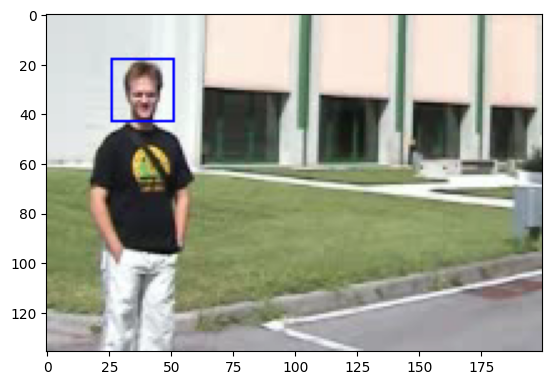

In [156]:
# 画像とテンプレートのサイズを取得
image_height, image_width, _ = image_rgb.shape
template_height, template_width, _ = template_rgb.shape

# テンプレートマッチングを実行
result = cv2.matchTemplate(image_rgb, template_rgb, cv2.TM_SQDIFF)

# 最小のスコアとその位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# 最も一致する位置（最小のMSEスコアの位置）
best_x, best_y = min_loc

# 結果の確認のため、最も一致する位置に矩形を描画
result_image = image_rgb.copy()
cv2.rectangle(result_image, (best_x, best_y), (best_x + template_width, best_y + template_height), (0, 0, 255))

# 結果を表示
plt.imshow(result_image)

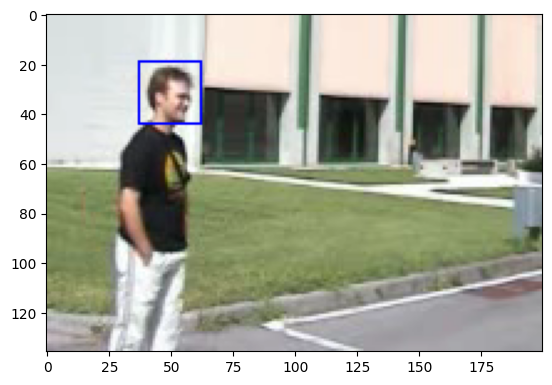

In [158]:
# 画像ファイルの読み込み
image = cv2.imread("sbi/sbi160.png")

# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像とテンプレートのサイズを取得
image_height, image_width, _ = image_rgb.shape
template_height, template_width, _ = template_rgb.shape

# テンプレートマッチングを実行
result = cv2.matchTemplate(image_rgb, template, cv2.TM_SQDIFF)

# 最小のスコアとその位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# 最も一致する位置（最小のMSEスコアの位置）
best_x, best_y = min_loc

# 結果の確認のため、最も一致する位置に矩形を描画
result_image = image_rgb.copy()
cv2.rectangle(result_image, (best_x, best_y), (best_x + template_width, best_y + template_height), (0, 0, 255))

# 結果を表示
plt.imshow(result_image)